# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Three observable trends:
1) Based on the analysis of 500+ cities, highest temperatures were associated with Latitudes on or around the equator (or 0 degree latitude). The further the cities were located from the equator the lower the temperatures destributed were (hence the bell curve of the scatter plot).

2) Based on the scatter plots, there was no strong correlation observed between the Latitude and other analyzed parameters such as Cloudiness, Humidity, and Wind Speed.

3) These findings were further strengthened by linear regression analysis. Thus, Northern Hemisphere - Max Temp vs. Latitude Linear Regression showed a strong correlation with r=0.72. Notably, correlation was slightly weaker for these parameters in Southern Henisphere, with r=0.53. Linear regression analysis for other parameters demonstrated r values closer to 0, further illustrating the point that the was no direct correlation between latitude and Cloudiness, Humidity, and Wind Speed

In [24]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
import time

#Open Weather key import
from config import api_key

#citipy import to determine city based on longitude and latitude 
from citipy import citipy

units="imperial"

#Output csv
output = "Output/weather_df.csv"

In [25]:
#Temperature in F
units="imperial"

# Range of latitude and longitude
lat_range = (-90, 90)
lon_range = (-180, 180)

#url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

#count of pass throughs
count = 0
set_initial = 1

## Generate Cities List

In [26]:
#Empty lists for latitude/longitude and cities
lat_lons = []
cities = []

#Set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lons = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lons = zip(lats, lons)

#Find nearest city for each latitude/longitude combination using citipy
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
#Adding only unique cities
    if city not in cities:
        cities.append(city)

#Count of cities
len(cities)

636

In [23]:
# # Test
# city='Chicago'
# response = requests.get(url + city).json()
# response

{'coord': {'lon': -87.65, 'lat': 41.85},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 65.89,
  'feels_like': 60.39,
  'temp_min': 63,
  'temp_max': 68,
  'pressure': 1013,
  'humidity': 63},
 'visibility': 10000,
 'wind': {'speed': 11.41, 'deg': 60},
 'clouds': {'all': 75},
 'dt': 1602450744,
 'sys': {'type': 1,
  'id': 4861,
  'country': 'US',
  'sunrise': 1602417528,
  'sunset': 1602458115},
 'timezone': -18000,
 'id': 4887398,
 'name': 'Chicago',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
#Empty lists for parameters
city_final = []
lats = []
lons = []
max_temps = []
humidities = []
cloudiness_s = []
wind_speeds = []
countries = []
dates = []



#set initial count
count = 0
set_initial = 1

print("Beginning Data Retrieval")
#loop through cities to collect parameters 
for city in cities:
    try:
        response = requests.get(url + city.replace(" ","&")).json()
        lats.append(response['coord']['lat'])
        lons.append(response['coord']['lon'])  
        max_temps.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        cloudiness_s.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        
        if count > 48:
            count = 1
            set_initial += 1
            city_final.append(city)
        else:
            count += 1
            city_final.append(city)
        print(f"Processing Record {count} of Set {set_initial} | {city}")
    except Error:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")



Beginning Data Retrieval
Processing Record 1 of Set 1 | santa cruz
Processing Record 2 of Set 1 | pacifica
Processing Record 3 of Set 1 | impfondo
Processing Record 4 of Set 1 | nome
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | albany
City not found. Skipping...
Processing Record 9 of Set 1 | ahipara
Processing Record 10 of Set 1 | kutum
City not found. Skipping...
Processing Record 11 of Set 1 | phonhong
Processing Record 12 of Set 1 | ihosy
Processing Record 13 of Set 1 | praya
Processing Record 14 of Set 1 | rio grande
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | belluno
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | taree
Processing Record 22 of Set 1 | baruun-urt
Processing Record 23 of Set 1 | hu

Processing Record 36 of Set 4 | tasiilaq
Processing Record 37 of Set 4 | kodiak
Processing Record 38 of Set 4 | torbay
Processing Record 39 of Set 4 | flin flon
Processing Record 40 of Set 4 | broome
Processing Record 41 of Set 4 | isangel
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 42 of Set 4 | changji
Processing Record 43 of Set 4 | avera
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | thinadhoo
Processing Record 46 of Set 4 | cockburn town
City not found. Skipping...
Processing Record 47 of Set 4 | aklavik
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of Set 4 | aberdeen
Processing Record 49 of Set 4 | skjervoy
Processing Record 1 of Set 5 | onda
Processing Record 2 of Set 5 | sinnamary
Processing Record 3 of Set 5 | ostrovnoy
Processing Record 4 of Set 5 | faanui
Processing Record 5 of Set 5 | sanming
Processing Record 6 of Set 5 | constitucion
Processing Record 7 of

Processing Record 25 of Set 8 | kashiwazaki
Processing Record 26 of Set 8 | verkhnevilyuysk
Processing Record 27 of Set 8 | grand gaube
Processing Record 28 of Set 8 | udachnyy
Processing Record 29 of Set 8 | san jose
Processing Record 30 of Set 8 | odesskoye
Processing Record 31 of Set 8 | anadyr
Processing Record 32 of Set 8 | cotonou
Processing Record 33 of Set 8 | spencer
Processing Record 34 of Set 8 | yulara
Processing Record 35 of Set 8 | atlantic beach
Processing Record 36 of Set 8 | vardo
Processing Record 37 of Set 8 | gornopravdinsk
Processing Record 38 of Set 8 | manbij
Processing Record 39 of Set 8 | boende
Processing Record 40 of Set 8 | turukhansk
Processing Record 41 of Set 8 | oranjestad
Processing Record 42 of Set 8 | mahina
Processing Record 43 of Set 8 | nouadhibou
City not found. Skipping...
Processing Record 44 of Set 8 | acapulco
Processing Record 45 of Set 8 | kuusamo
Processing Record 46 of Set 8 | portalegre
Processing Record 47 of Set 8 | khani
Processing Rec

Processing Record 8 of Set 12 | nara
Processing Record 9 of Set 12 | kingaroy
Processing Record 10 of Set 12 | svetlogorsk
Processing Record 11 of Set 12 | baykit
City not found. Skipping...
Processing Record 12 of Set 12 | kaitangata
Processing Record 13 of Set 12 | roald
Processing Record 14 of Set 12 | polson
Processing Record 15 of Set 12 | bisira
City not found. Skipping...
Processing Record 16 of Set 12 | dubbo
Processing Record 17 of Set 12 | jiangyou
Processing Record 18 of Set 12 | iquique
Processing Record 19 of Set 12 | yar-sale
Processing Record 20 of Set 12 | barcelos
Processing Record 21 of Set 12 | naantali
Processing Record 22 of Set 12 | port-gentil
Processing Record 23 of Set 12 | front royal
Processing Record 24 of Set 12 | dingle
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
#Create data dictionary 
weather_df = pd.DataFrame ({
    "City":city_final
    ,"Lat":lats
    ,"Lng":lons
    ,"Max Temp":max_temps
    ,"Humidity":humidities
    ,"Cloudiness":cloudiness_s
    ,"Wind Speed":wind_speeds 
    ,"Country":countries
    ,"Date":dates 
})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santa cruz,17.49,120.43,77.41,87,99,4.85,PH,1602452529
1,pacifica,37.61,-122.49,69.01,56,1,17.22,US,1602452446
2,impfondo,1.64,18.07,70.23,91,97,2.93,CG,1602452529
3,nome,64.50,-165.41,42.80,56,75,6.93,US,1602452529
4,thompson,55.74,-97.86,48.20,76,75,4.70,CA,1602452340


In [31]:
#print to csv
weather_df.to_csv(output)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [34]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = weather_df.loc[(weather_df['Humidity']>100)]
humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

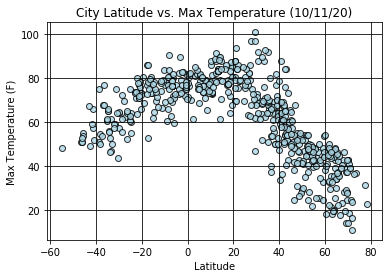

In [37]:
#Scatter plot: Temperature (F) vs. Latitude
plt.scatter(weather_df["Lat"], weather_df["Max Temp"],
            edgecolors="black", facecolors="lightblue", alpha=0.8)
plt.title("City Latitude vs. Max Temperature (10/11/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (linestyle="-",color="black")

plt.savefig("Images/Figure1.png")

plt.show()

As show on the graph above, based on the analysis of 500+ cities, highest temperatures were associated with Latitudes on or around the equator (or 0 degree latitude). The further the cities were located from the equator the lower the temperatures destributed were (hence the bell curve).

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show>

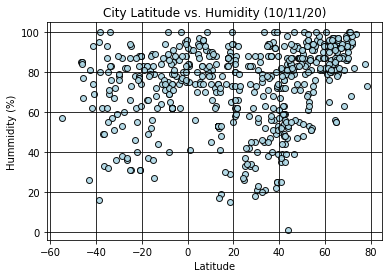

In [39]:
#Scatter plot: Hummidity (%) vs Latitude
plt.scatter(weather_df["Lat"], weather_df['Humidity'], 
            edgecolor='black', facecolor='lightblue', alpha=0.9)
plt.title("City Latitude vs. Humidity (10/11/20)")
plt.xlabel('Latitude')
plt.ylabel('Hummidity (%)')
plt.grid (linestyle="-",color="black")

plt.savefig('Images/Figure2.png')

plt.show

As shown on the graph above, no strong correlation was observed between the Humidity levels and Latitudes. However, it does appear that Northern Hemisphere tends to be more humid.

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show>

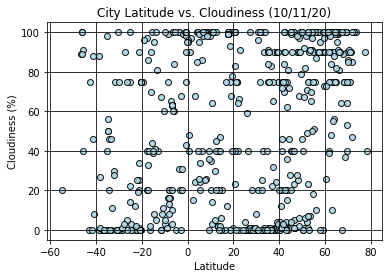

In [40]:
#Scatter plot: Cloudiness (%) vs Latitude
plt.scatter(weather_df["Lat"], weather_df['Cloudiness'], 
            edgecolor='black', facecolor='lightblue', alpha=0.9)
plt.title("City Latitude vs. Cloudiness (10/11/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid (linestyle="-",color="black")

plt.savefig('Images/Figure3.png')

plt.show

As demonstrated on the plot above, no strong relationship was observed between the Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show>

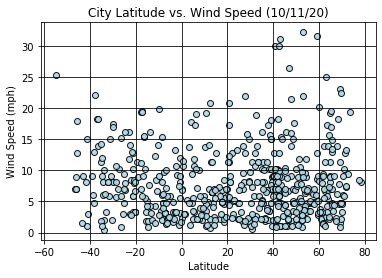

In [41]:
#Scatter plot: Wind Speed (mph) vs Latitude
plt.scatter(weather_df["Lat"], weather_df['Wind Speed'], 
            edgecolor='black', facecolor='lightblue', alpha=0.9)
plt.title("City Latitude vs. Wind Speed (10/11/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid (linestyle="-",color="black")

plt.savefig('Images/Figure4.png')

plt.show

No strong relationship was observed between Latitude and Wind Speed.

## Linear Regression

In [50]:
#Create different df for both hemispheres
northern_hem_df = weather_df.loc[(weather_df['Lat']>=0)]
southern_hem_df = weather_df.loc[(weather_df['Lat']<0)]

#FUNCTION
def plot_linear_regression (x_values, y_values, ylabel, text_coordinates):
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    #print(regress_values)
    line_eq="y=" +str(round(slope,2)) + "x+" +str(round(intercept,2))
#     plt.scatter(x_values,
#                 y_values), 
#                 ylabel, coordinates) 
               
    plt.annotate #Line etc
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7175196401710354


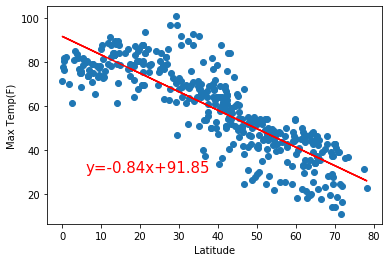

<Figure size 432x288 with 0 Axes>

In [63]:
plt.scatter(northern_hem_df['Lat'], northern_hem_df['Max Temp'])
x_values=northern_hem_df['Lat']
y_values=northern_hem_df['Max Temp']
y_label="Max Temp(F)"


plot_linear_regression(x_values, y_values, y_label,(6,30))
plt.show()
#plt.savefig('Images/Figure5.png')
#Coordinates were provided by my tutor as an example for how to build a function

# plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))
# plot_linear_regression(x_values, y_values, 'Humidity',(40,10))
# plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))
# plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))
# plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))
# plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))
# plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5258447976634464


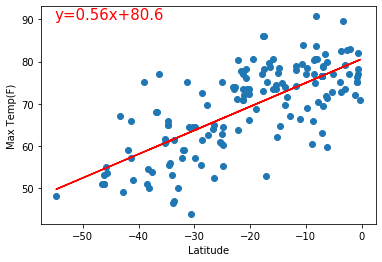

<Figure size 432x288 with 0 Axes>

In [64]:
plt.scatter(southern_hem_df['Lat'], southern_hem_df['Max Temp'])
x_values=southern_hem_df['Lat']
y_values=southern_hem_df['Max Temp']
y_label="Max Temp(F)"

plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

#plt.savefig('Images/Figure6.png')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07175855913374299


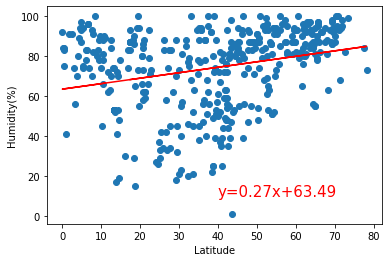

<Figure size 432x288 with 0 Axes>

In [60]:
plt.scatter(northern_hem_df['Lat'], northern_hem_df['Humidity'])
x_values=northern_hem_df['Lat']
y_values=northern_hem_df['Humidity']
y_label="Humidity(%)"

plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

#plt.savefig('Images/Figure7.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03352891633305132


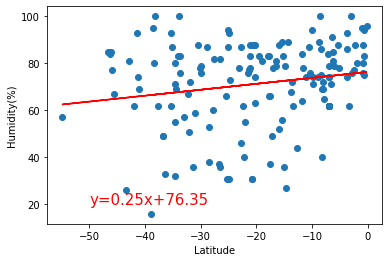

In [68]:
#plt.savefig('Images/Figure8.png')

plt.scatter(southern_hem_df['Lat'], southern_hem_df['Humidity'])
x_values=southern_hem_df['Lat']
y_values=southern_hem_df['Humidity']
y_label="Humidity(%)"

plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06549128786793301


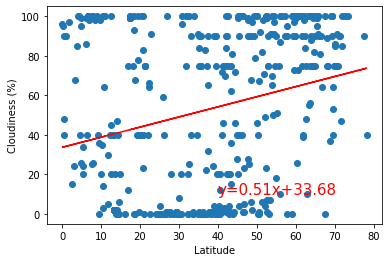

In [66]:
#plt.savefig('Images/Figure9.png')
plt.scatter(northern_hem_df['Lat'], northern_hem_df['Cloudiness'])
x_values=northern_hem_df['Lat']
y_values=northern_hem_df['Cloudiness']
y_label="Cloudiness (%)"
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.036053963695556586


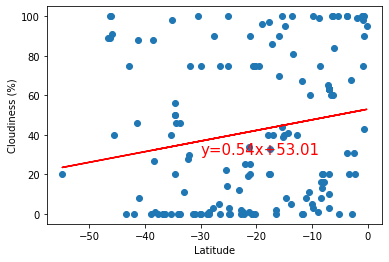

In [67]:
#plt.savefig('Images/Figure10.png')
plt.scatter(southern_hem_df['Lat'], southern_hem_df['Cloudiness'])
x_values=southern_hem_df['Lat']
y_values=southern_hem_df['Cloudiness']
y_label="Cloudiness (%)"
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.011136915586776678


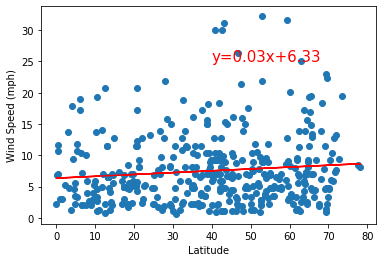

In [69]:
#plt.savefig('Images/Figure11.png')
plt.scatter(northern_hem_df['Lat'], northern_hem_df['Wind Speed'])
x_values=northern_hem_df['Lat']
y_values=northern_hem_df['Wind Speed']
y_label="Wind Speed (mph)"

plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09312665600340495


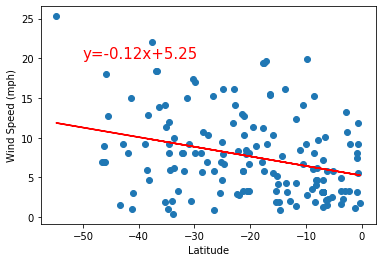

In [70]:
plt.scatter(southern_hem_df['Lat'], southern_hem_df['Wind Speed'])
x_values=southern_hem_df['Lat']
y_values=southern_hem_df['Wind Speed']
y_label="Wind Speed (mph)"

plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

#plt.savefig('Images/Figure12.png')
